## Demos

### Load in the Database

In [3]:
from astrodb_utils import load_astrodb
from simple import REFERENCE_TABLES

SCHEMA_PATH = "simple/schema.yaml" 
db = load_astrodb(
     "SIMPLE.sqlite", 
     recreatedb=True,  
     reference_tables=REFERENCE_TABLES, 
     felis_schema=SCHEMA_PATH
     )

100%|██████████| 3619/3619 [14:19<00:00,  4.21it/s]


## Query the Database

### Using Astrodbkit Query Functions

##### What is Astrodbkit? (Link: https://astrodbkit.readthedocs.io/en/latest/#exploring-the-schema)
##### AstrodbKit is an astronomical database handler code built on top of SQLAlchemy. We can implement various functions from the python package to query the database in robust ways.

In [4]:
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u

#### Lets check the tables in the database

In [5]:
for table in db.metadata.tables:
    print(table)

CompanionList
CompanionParameters
Sources
Publications
CompanionRelationships
Gravities
Regimes
Instruments
Telescopes
ModeledParameters
Parameters
Names
Parallaxes
Photometry
PhotometryFilters
ProperMotions
RadialVelocities
RotationalParameters
Spectra
SpectralTypes
Versions


#### Now that we know the tables,lets do a more detailed search into the tables and their content

#### Lets look at the sources available within SIMPLE

In [6]:
db.query(db.Sources).all()    

[('2MASS J03552014+1439297', 58.83375, 14.658056, None, None, None, 'Cruz07', None, None),
 ('1RXS J115928.5-524717', 179.864, -52.7886, None, '2000', None, 'Hamb04.265', None, None),
 ('ULAS J114925.58-014343.2', 177.3569, -1.7287, None, '2000', None, 'Burn10.1885', None, None),
 ('DENIS-P J1756561-480509', 269.2342, -48.086, None, '2000', None, 'Phan08', None, None),
 ('PSO J024.4369+09.1360', 24.4372, 9.1366, None, '2000', None, 'Skrz16', None, 'Best20 lists discovery as Skrz16; Best20a'),
 ('SDSS J161420.50+004643.6', 243.585, 0.7785, None, '2000', None, 'Hawl02', None, None),
 ('SDSS J094903.15+264944.2', 147.2633, 26.8288, None, '2000', None, 'Schm10.1808', None, None),
 ('SDSS J083717.21-000018.0', 129.3215835, -0.004972, None, None, '0837-0000', 'Legg00', None, None),
 ('2MASS J06080232-2944590', 92.0097, -29.7497, None, '2000', None, 'Cruz03', None, None),
 ('2MASS J09373487+2931409', 144.395292, 29.528028, None, None, '0937+2931', 'Burg02.421', None, None),
 ('ULAS J133943.79

#### Thats a lot of sources! Lets say you just want to find all sources that start with "WISE" 

In [7]:
db.search_object('wise', fmt='astropy')

Using table 'Sources' with columns ['source'] for matching object names
Using table 'Names' with columns ['other_name'] for matching object names


source,ra,dec,epoch,equinox,shortname,reference,other_references,comments
str32,float64,float64,object,object,object,str11,object,object
1RXS J115928.5-524717,179.864,-52.7886,None,2000,None,Hamb04.265,None,None
2MASS J00011217+1535355,0.300708,15.593194,None,None,0001+1535,Knap04,None,None
2MASS J00034227-2822410,0.926125,-28.378056,None,None,0003-2822,Cruz07,None,None
2MASS J00040288-6410358,1.012,-64.176611,None,None,0004-6410,Kirk10,None,None
2MASS J00043484-4044058,1.145166,-40.734944,None,None,0004-4044BC,Eros99,None,None
2MASS J00044144-2058298,1.1728,-20.975,None,2000,None,Kend07,None,None
2MASS J00045753-1709369,1.2398,-17.1603,None,2000,None,Crif05,None,None
2MASS J00054844-2157196,1.4519,-21.9555,None,2000,None,Reyl04,None,None
2MASS J00070787-2458042,1.7827917,-24.967833,None,None,0007-2458,Reyl04,None,None


#### So you found the object youre looking for - lets now narrow down that query.

#### Lets see many names are associated with the object WISEPC J0333

In [8]:
db.search_object('WISEPC J0333', resolve_simbad=True, output_table='Names')

No Simbad match for WISEPC J0333
Including Simbad names, searching for: ['WISEPC J0333']
Using table 'Sources' with columns ['source'] for matching object names
Using table 'Names' with columns ['other_name'] for matching object names


source,other_name
str26,str26
WISEPC J033349.34-585618.7,CWISE J033349.31-585619.8
WISEPC J033349.34-585618.7,VHS J033349.30-585620.2
WISEPC J033349.34-585618.7,WISEPC J033349.34-585618.7


#### We know the source exist, so now we want to see all the data associated with the source. 

In [9]:
data = db.inventory('WISEPC J033349.34-585618.7', pretty_print=True)
print(data) 

{
    "Sources": [
        {
            "source": "WISEPC J033349.34-585618.7",
            "ra": 53.4557,
            "dec": -58.9384,
            "epoch": null,
            "equinox": "2000",
            "shortname": null,
            "reference": "Kirk11",
            "other_references": null,
            "comments": null
        }
    ],
    "Names": [
        {
            "other_name": "CWISE J033349.31-585619.8"
        },
        {
            "other_name": "VHS J033349.30-585620.2"
        },
        {
            "other_name": "WISEPC J033349.34-585618.7"
        }
    ],
    "Parallaxes": [
        {
            "parallax": 46.2,
            "parallax_error": 3.7,
            "adopted": true,
            "comments": null,
            "reference": "Kirk21"
        }
    ],
    "Photometry": [
        {
            "band": "IRAC.I1",
            "magnitude": 13.59,
            "magnitude_error": 0.02,
            "telescope": "Spitzer",
            "epoch": null,
            

#### Now lets do a broader search, say you want to find all objects with the publication reference "Cruz18" 

#### Within astrodbkit, we allow for the parameter format (fmt) so that you can decide how you wish to visualize your query. Your options are pandas, astropy, or default (default is an astropy table)

In [10]:
db.search_string('Cruz18', fuzzy_search=False)  # search for strings exactly matching Cruz19 anywhere in the database
db.search_string('Cruz18', fuzzy_search=False, fmt='pandas')  # as above, but have each table as a pandas dataframe

Sources
         source               ra      ... other_references   comments  
----------------------- ------------- ... ---------------- ------------
2MASS J15382417-1953116     234.60071 ...             None         None
2MASS J00110940+5149236      2.789182 ...             None         None
2MASS J15063706+2759544     226.65421 ...             None       galaxy
2MASS J05583706-1339123     89.654445 ...             None         None
2MASS J23490528+1833150       357.272 ...             None         None
2MASS J23202927+4123415     350.12167 ...             None         None
2MASS J22433237-1525260    340.884859 ...             None         None
2MASS J12490458-3454080     192.26979 ...             None       galaxy
2MASS J23364145+4822480    354.172713 ...             None         None
2MASS J05574102-1333264     89.420954 ...             None        not M
                    ...           ... ...              ...          ...
2MASS J05574229-1333156     89.426209 ...             No

{'Sources':                      source          ra        dec epoch equinox  shortname  \
 0   2MASS J15382417-1953116  234.600710 -19.886556  None    None  1538-1953   
 1   2MASS J00110940+5149236    2.789182  51.823257  None    None  0011+5149   
 2   2MASS J15063706+2759544  226.654210  27.998833  None    None       None   
 3   2MASS J05583706-1339123   89.654445 -13.653394  None    None  0558-1339   
 4   2MASS J23490528+1833150  357.272000  18.554167  None    None  2349+1833   
 5   2MASS J23202927+4123415  350.121670  41.394722  None    None       None   
 6   2MASS J22433237-1525260  340.884859 -15.423901  None    None  2243-1525   
 7   2MASS J12490458-3454080  192.269790 -34.902194  None    None       None   
 8   2MASS J23364145+4822480  354.172713  48.380024  None    None  2336+4822   
 9   2MASS J05574102-1333264   89.420954 -13.557334  None    None       None   
 10  2MASS J01581172+3232013   29.548833  32.533694  None    None  0158+3231   
 11  2MASS J17213581-0619145 

#### Next exaple is query region, where you can use SkyCoord to create a coordinates object that query_region uses to query the database, in this example the Sources table. Make sure to use as accurate as a coordinate as possible. 

In [11]:
# An example of query wth an empty table
incorrect_results = db.query_region(SkyCoord(144.3, 29.5, frame='icrs', unit='deg'), output_table='Sources', ra_col='ra', dec_col='dec')  # specifying the name of the table with coordinate information
print(incorrect_results)  

# An example that queries the database correctly 
correct_results = db.query_region(SkyCoord(144.395292, 29.528028, frame='icrs', unit='deg'), output_table='Sources', ra_col='ra', dec_col='dec')  # specifying the name of the table with coordinate information
correct_results

<No columns>


source,ra,dec,epoch,equinox,shortname,reference,other_references,comments
str23,float64,float64,object,object,str9,str10,object,object
2MASS J09373487+2931409,144.395292,29.528028,None,None,0937+2931,Burg02.421,None,None


#### Have a more complex query? Let use astrodb_utils.sql_query to run a SQL query directly 
##### astrodbkit has a functoin sql_query which allows you to add in specific functions without needing to write out all the sql commands yourself

In [12]:
from sqlalchemy import and_, or_

# Query with multiple conditions
db.query(db.Sources).filter(db.Sources.c.dec > 0).filter(db.Sources.c.ra < 200).all()

# Query with AND
db.query(db.Sources).filter(and_(db.Sources.c.dec > 0, db.Sources.c.ra > 200)).all()

# Query with OR
db.query(db.Sources).filter(or_(db.Sources.c.dec < 0, db.Sources.c.ra > 200)).all()

[('1RXS J115928.5-524717', 179.864, -52.7886, None, '2000', None, 'Hamb04.265', None, None),
 ('ULAS J114925.58-014343.2', 177.3569, -1.7287, None, '2000', None, 'Burn10.1885', None, None),
 ('DENIS-P J1756561-480509', 269.2342, -48.086, None, '2000', None, 'Phan08', None, None),
 ('SDSS J161420.50+004643.6', 243.585, 0.7785, None, '2000', None, 'Hawl02', None, None),
 ('SDSS J083717.21-000018.0', 129.3215835, -0.004972, None, None, '0837-0000', 'Legg00', None, None),
 ('2MASS J06080232-2944590', 92.0097, -29.7497, None, '2000', None, 'Cruz03', None, None),
 ('ULAS J133943.79+010436.4', 204.9326, 1.0768, None, '2000', None, 'Burn13', None, None),
 ('2MASS J21481326-6323265', 327.0553, -63.3908, None, '2000', None, 'Maro13', None, None),
 ('CWISEP J230158.30-645858.3', 345.4929166666666, -64.98286111111112, None, None, None, 'Meis20.74', None, None),
 ('WISE J200403.17-263751.7', 301.013, -26.6293, None, '2000', None, 'Thom13', None, None),
 ('VB 10', 289.2400917, 5.15060556, None, None

#### Query the count of sources in the database

In [13]:
# Query the total number of objects within SIMPLE
result = db.sql_query("SELECT COUNT(*) FROM Sources")
total_objects = result[0][0]


print(f"Total number of objects in the SIMPLE database: {total_objects}")


Total number of objects in the SIMPLE database: 3619


#### Query Sources by String 

In [14]:
wise_sources_query = "SELECT * FROM Sources WHERE source LIKE '%WISE%'"
wise_sources = db.sql_query(wise_sources_query)

print(f"Found {len(wise_sources)} WISE sources in the database")
print("\nFirst Three WISE Sources:")
for source in wise_sources[:3]:  # Display first 3 sources
    print(source)

Found 616 WISE sources in the database

First Three WISE Sources:
('CWISEP J230158.30-645858.3', 345.4929166666666, -64.98286111111112, None, None, None, 'Meis20.74', None, None)
('WISE J200403.17-263751.7', 301.013, -26.6293, None, '2000', None, 'Thom13', None, None)
('WISEA J012834.87-280302.5', 22.145291666666665, -28.050694444444446, None, None, None, 'Meis20.123', None, None)


#### Query by Program ID ("PID")

In [15]:
spectra_pid_query = "SELECT * FROM Spectra WHERE reference LIKE 'PID%'"
spectra_pid_results = db.sql_query(spectra_pid_query)

print(f"Found {len(spectra_pid_results)} spectra with PID references in the database")

if spectra_pid_results:
    for spectrum in spectra_pid_results:  
        print(spectrum)

Found 55 spectra with PID references in the database
('VB 10', 'https://s3.amazonaws.com/bdnyc/Gl+752B+%285-35um%29.txt', None, '$BDNYC_spectra/IRS/Gl 752B (5-35um).txt', 'mir', 'Spitzer', 'IRS', 'Missing', '2005-10-11 00:00:00.000000', None, 'PID29', None)
('2MASS J10042066+5022596', 'https://s3.amazonaws.com/bdnyc/IRS/G196-3B.txt', None, '$BDNYC_spectra/IRS/G196-3B.txt', 'mir', 'Spitzer', 'IRS', 'Missing', '2004-04-17 04:40:11.761000', None, 'PID51', None)
('2MASS J10224821+5825453', 'https://s3.amazonaws.com/bdnyc/IRS/1022%2B5825.txt', None, '$BDNYC_spectra/IRS/1022+5825.txt', 'mir', 'Spitzer', 'IRS', 'Missing', '2005-04-16 13:45:42.752000', None, 'PID3136', None)
('2MASS J12392727+5515371', 'https://s3.amazonaws.com/bdnyc/1239%2B5515.txt', None, '$BDNYC_spectra/IRS/1239+5515.txt', 'mir', 'Spitzer', 'IRS', 'Missing', '2004-04-18 02:01:06.605000', None, 'PID51', None)
('2MASS J00001354+2554180', 'https://s3.amazonaws.com/bdnyc/IRS/0000%2B2554%20%285-14.5um%29.txt', None, '$BDNYC_spec

### Using SQLAlchemy Query Functions

#### SQL via SQLalchemy 

In [16]:
from sqlalchemy import text

# Using connection from the existing database
with db.engine.connect() as conn:
    
    # Query all sources
    result = conn.execute(text("SELECT * FROM Sources LIMIT 10"))
    print("First 10 Sources (Raw SQL):")
    for row in result:
        print(f"Source: {row.source}, RA: {row.ra}, Dec: {row.dec}")

    # Find spectra with a specific instrument
    result = conn.execute(
        text("SELECT * FROM Spectra WHERE instrument = :instrument LIMIT 5"),
        {"instrument": "IRS"}
    )
    print("\nSpectra from IRS instrument (first 5):")
    for row in result:
        print(f"Source: {row.source}, Telescope: {row.telescope}")

        # Join query - find all spectra for sources with names containing "WISE"
        result = conn.execute(
            text("""
            SELECT Sources.source, Spectra.telescope, Spectra.instrument
            FROM Sources 
            JOIN Spectra ON Sources.source = Spectra.source
            WHERE Sources.source LIKE :pattern
            LIMIT 5
            """),
            {"pattern": "%WISE%"}
        )
        print("\nWISE sources with spectra (first 5):")
        for row in result:
            print(f"Source: {row.source}, Telescope: {row.telescope}, Instrument: {row.instrument}")
            
        # Aggregate query - count sources by publication reference
        result = conn.execute(
            text("""
            SELECT reference, COUNT(*) as count 
            FROM Sources 
            GROUP BY reference 
            ORDER BY count DESC
            LIMIT 3
            """)
        )
        print("\nTop 3 references by number of sources:")
        for row in result:
            print(f"Reference: {row.reference}, Count: {row.count}")


First 10 Sources (Raw SQL):
Source: 2MASS J03552014+1439297, RA: 58.83375, Dec: 14.658056
Source: 1RXS J115928.5-524717, RA: 179.864, Dec: -52.7886
Source: ULAS J114925.58-014343.2, RA: 177.3569, Dec: -1.7287
Source: DENIS-P J1756561-480509, RA: 269.2342, Dec: -48.086
Source: PSO J024.4369+09.1360, RA: 24.4372, Dec: 9.1366
Source: SDSS J161420.50+004643.6, RA: 243.585, Dec: 0.7785
Source: SDSS J094903.15+264944.2, RA: 147.2633, Dec: 26.8288
Source: SDSS J083717.21-000018.0, RA: 129.3215835, Dec: -0.004972
Source: 2MASS J06080232-2944590, RA: 92.0097, Dec: -29.7497
Source: 2MASS J09373487+2931409, RA: 144.395292, Dec: 29.528028

Spectra from IRS instrument (first 5):
Source: SDSS J083717.21-000018.0, Telescope: Spitzer

WISE sources with spectra (first 5):
Source: WISE J235402.77+024015.0, Telescope: JWST, Instrument: MIRI
Source: WISE J235402.77+024015.0, Telescope: JWST, Instrument: NIRSpec
Source: WISE J235402.77+024015.0, Telescope: HST, Instrument: WFC3
Source: WISEP J031325.96+780

#### SQLAlchemy ORM Query Methods

##### What is SQLAlchemy ORM?
##### SQLAlchemy ORM (Object-Relational Mapping) is a powerful library that allows developers to interact with databases using Python objects instead of writing raw SQL queries. It provides a high-level abstraction over SQL, making it easier to work with databases in a more Pythonic way.

In [21]:
# SQLAlchemy ORM methods for querying the database
from sqlalchemy.orm import sessionmaker
from sqlalchemy import func, desc

Session = sessionmaker(bind=db.engine)
session = Session()

# Using ORM to query all sources
all_sources = session.query(db.Sources).all()
print(f"Total number of sources: {len(all_sources)}")   

# Using ORM to find sources with the most spectra
most_spectra = session.query(db.Spectra.c.source, func.count(db.Spectra.c.source).label('count')).group_by(db.Spectra.c.source).order_by(desc('count')).limit(5).all()
print("\nTop 5 sources with the most spectra:")
for source in most_spectra:
    print(f"Source: {source[0]}, Number of spectra: {source[1]}")

# Using ORM to count sources by reference
counted_references = session.query(db.Sources.c.reference, func.count(db.Sources.c.source).label('count')).group_by(db.Sources.c.reference).order_by(desc('count')).limit(5).all()
print("\nTop 5 references by number of sources:")
for ref in counted_references:
    print(f"Reference: {ref[0]}, Count: {ref[1]}")

# Closing the session
session.close()
# Note: Always close the session to release resources


Total number of sources: 3619

Top 5 sources with the most spectra:
Source: 2MASS J04151954-0935066, Number of spectra: 9
Source: 2MASS J00361617+1821104, Number of spectra: 8
Source: 2MASS J03552337+1133437, Number of spectra: 8
Source: 2MASS J05395200-0059019, Number of spectra: 8
Source: 2MASS J06244595-4521548, Number of spectra: 8

Top 5 references by number of sources:
Reference: Schm10.1808, Count: 208
Reference: Reid08.1290, Count: 206
Reference: West08, Count: 194
Reference: Cruz03, Count: 165
Reference: Maro15, Count: 113


## Visualizing Spectra

##### In the notebook VisualizingDemo.ipynb, we will go into further detail how to visualize data with SIMPLE. However for this use case, we will provide a simple method using the libraries Spectrum (Specutils) and Matplotlib for a basic tutorial.

##### In this use case, we are looking to plot the spectra for the object with the most spectra available in SIMPLE. Using what we just learned, we can use SQL to query the database for this answer.

In [22]:
from specutils import Spectrum
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
plt.rcParams['font.family'] = 'serif'

In [23]:
# Query to find sources with multiple spectra
query = """
SELECT source, COUNT(*) as spectra_count
FROM Spectra
GROUP BY source
HAVING COUNT(*) > 1
ORDER BY spectra_count DESC
LIMIT 10
"""

results = db.sql_query(query)

print("Sources with multiple spectra:")
for result in results:
    source_name = result[0]
    count = result[1]
    print(f"{source_name}: {count} spectra")


Sources with multiple spectra:
2MASS J04151954-0935066: 9 spectra
2MASS J00361617+1821104: 8 spectra
2MASS J03552337+1133437: 8 spectra
2MASS J05395200-0059019: 8 spectra
2MASS J06244595-4521548: 8 spectra
2MASS J02550357-4700509: 7 spectra
2MASS J08251968+2115521: 7 spectra
2MASS J16241436+0029158: 7 spectra
2MASS J04234858-0414035: 6 spectra
2MASS J04390101-2353083: 6 spectra


##### Great! We see that the object '2MASS J04151954-0935066' has the most spectra with 9 total spectra files associated with it. Let look further into this object to pull that data.

In [24]:
spectra_query = "SELECT * FROM Spectra WHERE Source LIKE '%2MASS J0415%'"
spectra_results = db.sql_query(spectra_query)

print(f"Found {len(spectra_results)} spectra matching the query.")

if spectra_results:
    for spectrum in spectra_results:  
        print(spectrum)

Found 9 spectra matching the query.
('2MASS J04151954-0935066', 'https://s3.amazonaws.com/bdnyc/IRS/0415-0935%20%28LL2%29.txt', None, '$BDNYC_spectra/IRS/0415-0935 (LL2).txt', 'mir', 'Spitzer', 'IRS', 'Missing', '2005-09-06 00:00:00.000000', None, 'PID3259', None)
('2MASS J04151954-0935066', 'https://s3.amazonaws.com/bdnyc/IRS/0415-0935.txt', None, '$BDNYC_spectra/IRS/0415-0935.txt', 'mir', 'Spitzer', 'IRS', 'Missing', '2005-09-07 00:00:00.000000', None, 'PID3431', None)
('2MASS J04151954-0935066', 'https://bdnyc.s3.amazonaws.com/IRS/2MASS+J04151954-0935066.fits', 'https://bdnyc.s3.amazonaws.com/IRS/0415-0935_IRS_spectrum.dat', None, 'mir', 'Spitzer', 'IRS', 'SL', '2005-09-06 00:00:00.000000', 'SL2,SL1, There are multiple observation dates', 'Suar22', None)
('2MASS J04151954-0935066', 'https://bdnyc.s3.us-east-1.amazonaws.com/FIRE/FIRE_0415-0935.fits', None, None, 'nir', 'Magellan I Baade', 'FIRE', 'Echelle', '2010-09-20 00:00:00.000000', None, 'Alej25', None)
('2MASS J04151954-0935066

##### We see that are several spectra from different instruments associated with 2MASS J0415, so lets narrow down to only a couple. Lets look at only those in the near infared which can be done by only selecting those with 'nir' as a key.

In [ ]:
print(spectra_results)

print(f"Total spectra for {source_name}: {len(spectra_results)}")

# Filter only the NIR spectra
nir_spectra = []

for spec in spectra_results:
    # Check regime field (index 4) for 'nir' value
    if spec[4] and 'nir' in spec[4].lower():
        nir_spectra.append(spec)

print(f"Found {len(nir_spectra)} NIR spectra")

for i, spec in enumerate(nir_spectra):
    instrument = spec[6]
    reference = spec[10] 
    url = spec[1].split('/')[-1] 
    print(f"{i+1}. {url} - Instrument: {instrument}, Reference: {reference}")

print(nir_spectra)


[('2MASS J04151954-0935066', 'https://s3.amazonaws.com/bdnyc/IRS/0415-0935%20%28LL2%29.txt', None, '$BDNYC_spectra/IRS/0415-0935 (LL2).txt', 'mir', 'Spitzer', 'IRS', 'Missing', '2005-09-06 00:00:00.000000', None, 'PID3259', None), ('2MASS J04151954-0935066', 'https://s3.amazonaws.com/bdnyc/IRS/0415-0935.txt', None, '$BDNYC_spectra/IRS/0415-0935.txt', 'mir', 'Spitzer', 'IRS', 'Missing', '2005-09-07 00:00:00.000000', None, 'PID3431', None), ('2MASS J04151954-0935066', 'https://bdnyc.s3.amazonaws.com/IRS/2MASS+J04151954-0935066.fits', 'https://bdnyc.s3.amazonaws.com/IRS/0415-0935_IRS_spectrum.dat', None, 'mir', 'Spitzer', 'IRS', 'SL', '2005-09-06 00:00:00.000000', 'SL2,SL1, There are multiple observation dates', 'Suar22', None), ('2MASS J04151954-0935066', 'https://bdnyc.s3.us-east-1.amazonaws.com/FIRE/FIRE_0415-0935.fits', None, None, 'nir', 'Magellan I Baade', 'FIRE', 'Echelle', '2010-09-20 00:00:00.000000', None, 'Alej25', None), ('2MASS J04151954-0935066', 'https://bdnyc.s3.us-east-1.

Loading https://bdnyc.s3.us-east-1.amazonaws.com/FIRE/FIRE_0415-0935.fits... 
 Units for wavelength: um, Units for flux: erg / (Angstrom s cm2)
Loading https://bdnyc.s3.us-east-1.amazonaws.com/JWST/NIRSpec/jw02124-o059_s00001_nirspec_f290lp-g395h-s200a1-subs200a1_x1d_manual.fits... 
 Units for wavelength: um, Units for flux: Jy
Loading https://bdnyc.s3.us-east-1.amazonaws.com/AKARI_2MASS%2BJ04151954-0935066_2007-08-23.fits... 
 Units for wavelength: um, Units for flux: W / (um m2)
Loading https://bdnyc.s3.us-east-1.amazonaws.com/SpeX/Prism/IRTF_SpeX_2MASS%2BJ04151954-0935066_2003-09-17.fits... 
 Units for wavelength: um, Units for flux: erg / (Angstrom s cm2)


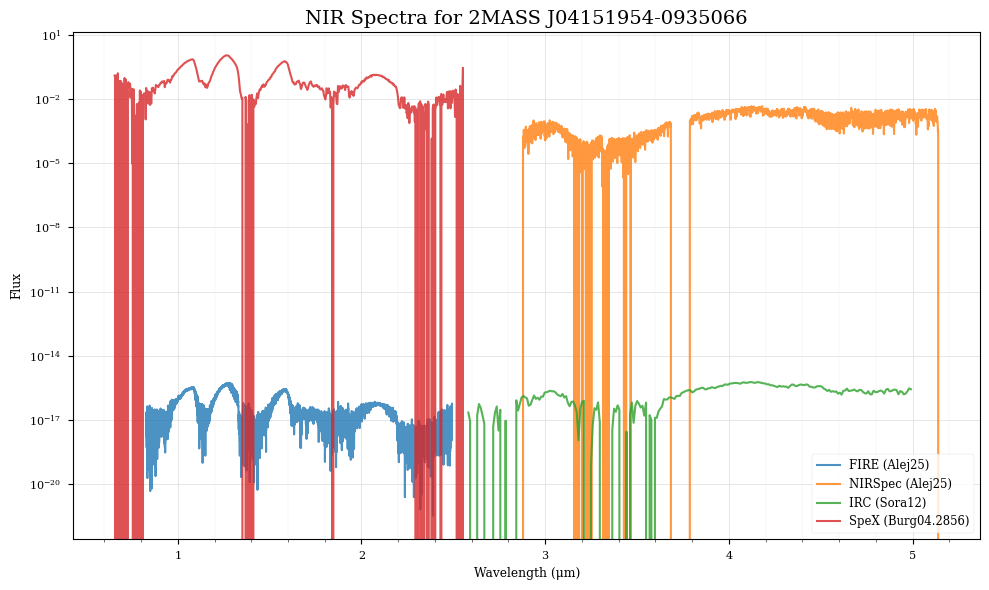

In [ ]:
from specutils import Spectrum1D
import numpy as np
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
import astropy.units as u


fig, ax = plt.subplots(figsize=(10, 6))

# Loop through the NIR spectra 
for i, spec_data in enumerate(nir_spectra):
    try:
        # Extract data
        url = spec_data[1]
        instrument = spec_data[6] if spec_data[6] else "Unknown"
        reference = spec_data[10] if spec_data[10] else "Unknown"
        
        # Load the spectrum
        spec = Spectrum1D.read(url, format = 'tabular-fits')
        
        # Get wavelength and flux with units
        wavelength = spec.spectral_axis
        flux = spec.flux
        
        print(f"Loading {url}... \n Units for wavelength: {wavelength.unit}, Units for flux: {flux.unit}")
        
        # Plot with distinct color and style for each spectrum
        ax.plot(wavelength, flux, 
                label=f"{instrument} ({reference})",
                alpha=0.8,
                linewidth=1.5)
        
    except Exception as e:
        print(f"Failed to load or plot spectrum: {url}")
        print(f"Error: {str(e)}")

# Plot configuration
ax.set_xlabel("Wavelength (μm)")
ax.set_ylabel("Flux")

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='major', color='gainsboro', linewidth=0.5)
ax.grid(True, which='minor', color='gainsboro', linewidth=0.3, alpha=0.5)

ax.set_yscale('log')

ax.set_title(f"NIR Spectra for {source_name}", fontsize=14)
ax.legend(loc='best', fontsize='small')

plt.tight_layout()
plt.show()

##### Notice how in our print statements it points out that some of our spectra has different units for Flux? Lets correct that and plot again. The most common of these four is erg / (Angstrom s cm2). I am also going to not include SpeX data as it's units are incorrect.

Loading https://bdnyc.s3.us-east-1.amazonaws.com/FIRE/FIRE_0415-0935.fits... 
 Units for wavelength: um, Units for flux: erg / (Angstrom s cm2)
Changed Units for wavelength: um, Units for flux: erg / (Angstrom s cm2) 

Loading https://bdnyc.s3.us-east-1.amazonaws.com/JWST/NIRSpec/jw02124-o059_s00001_nirspec_f290lp-g395h-s200a1-subs200a1_x1d_manual.fits... 
 Units for wavelength: um, Units for flux: Jy
Changed Units for wavelength: um, Units for flux: erg / (Angstrom s cm2) 

Loading https://bdnyc.s3.us-east-1.amazonaws.com/AKARI_2MASS%2BJ04151954-0935066_2007-08-23.fits... 
 Units for wavelength: um, Units for flux: W / (um m2)
Changed Units for wavelength: um, Units for flux: erg / (Angstrom s cm2) 

Loading https://bdnyc.s3.us-east-1.amazonaws.com/SpeX/Prism/IRTF_SpeX_2MASS%2BJ04151954-0935066_2003-09-17.fits... 
 Units for wavelength: um, Units for flux: erg / (Angstrom s cm2)
Changed Units for wavelength: um, Units for flux: erg / (Angstrom s cm2) 

Skipping SpeX spectrum due to un

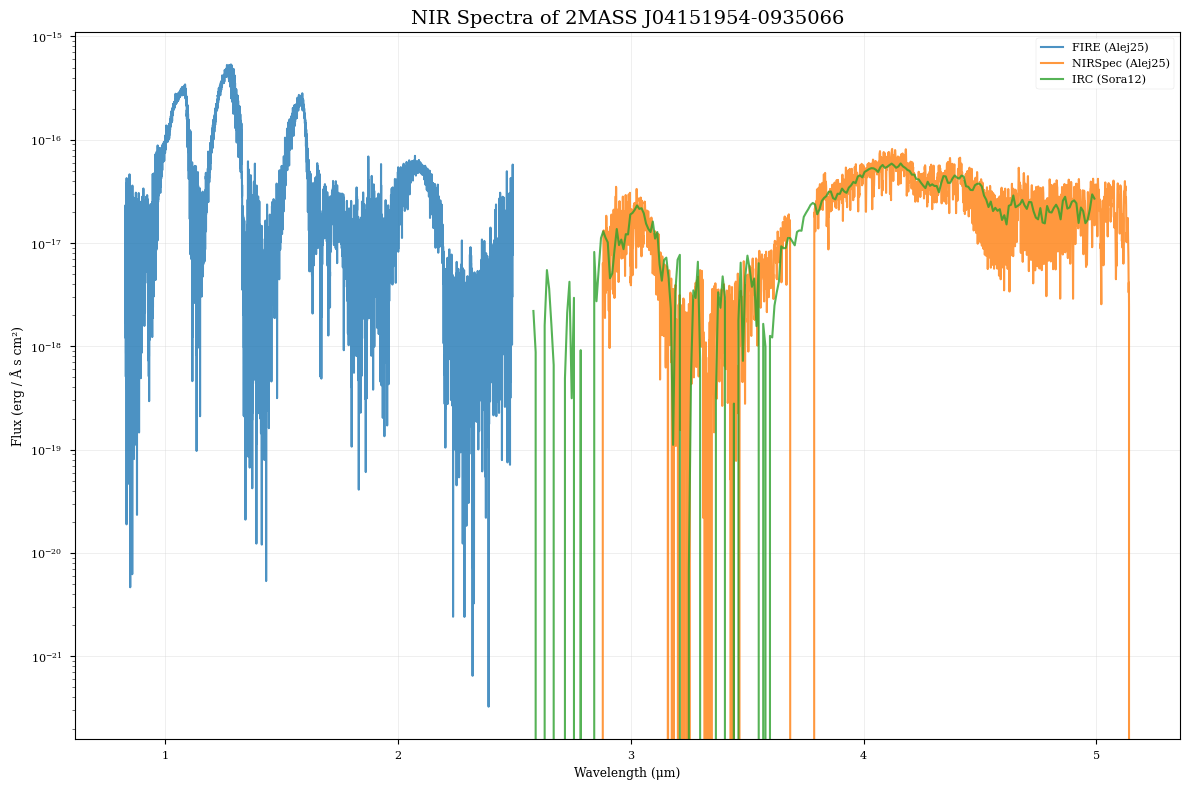

In [53]:
import astropy.constants as const


# Loop through each NIR spectrum and load it
for i, spec_data in enumerate(nir_spectra):
    try:
        # Extract data
        url = spec_data[1]
        instrument = spec_data[6] 
        reference = spec_data[10]
        
        # Load the spectrum
        spec = Spectrum1D.read(url, format='tabular-fits')
        
        # Get wavelength and flux with units
        wavelength = spec.spectral_axis
        flux = spec.flux
        
        print(f"Loading {url}... \n Units for wavelength: {wavelength.unit}, Units for flux: {flux.unit}")
        
        target_unit = u.erg / (u.s * u.cm**2 * u.AA)

        if not flux.unit.is_equivalent(target_unit):
            if flux.unit == u.Jy:
                lam = wavelength.to(u.AA)  
                fnu = flux.to(u.erg / u.s / u.cm**2 / u.Hz)  
                flux = fnu * (const.c.to(u.AA/u.s) / lam**2) 
                flux = flux.to(target_unit)

            elif flux.unit == u.W / (u.um * u.m**2):
                flux = flux.to(target_unit)

        flux = flux.to(target_unit) # Safety conversion in case of other units

                
        print(f"Changed Units for wavelength: {wavelength.unit}, Units for flux: {flux.unit} \n")
        
        if i == 0:
            plt.figure(figsize=(12, 8))
            ax = plt.gca()
            reference_flux = flux
        
        # Plot each spectrum with a unique color and label
        if instrument == "SpeX":
            print(f"Skipping SpeX spectrum due to unit issues: {url}")
        else:
            plt.plot(wavelength, flux, label=f"{instrument} ({reference})", alpha=0.8, linewidth=1.5)
        
    except Exception as e:
        print(f"Failed to load or plot spectrum: {url}")
        print(f"Error: {str(e)}")

# Plot configuration
plt.xlabel("Wavelength (μm)")
plt.ylabel("Flux (erg / Å s cm²)")
plt.title(f"NIR Spectra of {source_name}", fontsize=14)
plt.grid(True, color='lightgray', linestyle='-', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper right')

plt.yscale('log')

plt.tight_layout()
plt.show()